In [13]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

warnings.filterwarnings("ignore")

In [5]:
# pollution = pd.DataFrame(np.loadtxt('T1-2.dat',unpack=True)).T
pollution = pd.read_csv('USairpollution.csv',index_col=0)

In [6]:
pollution

,SO2,temp,manu,popul,wind,precip,predays
Albany,46,47.6,44,116,8.8,33.36,135
Albuquerque,11,56.8,46,244,8.9,7.77,58
Atlanta,24,61.5,368,497,9.1,48.34,115
Baltimore,47,55.0,625,905,9.6,41.31,111
Buffalo,11,47.1,391,463,12.4,36.11,166
Charleston,31,55.2,35,71,6.5,40.75,148
Chicago,110,50.6,3344,3369,10.4,34.44,122
Cincinnati,23,54.0,462,453,7.1,39.04,132
Cleveland,65,49.7,1007,751,10.9,34.99,155
Columbus,26,51.5,266,540,8.6,37.01,134


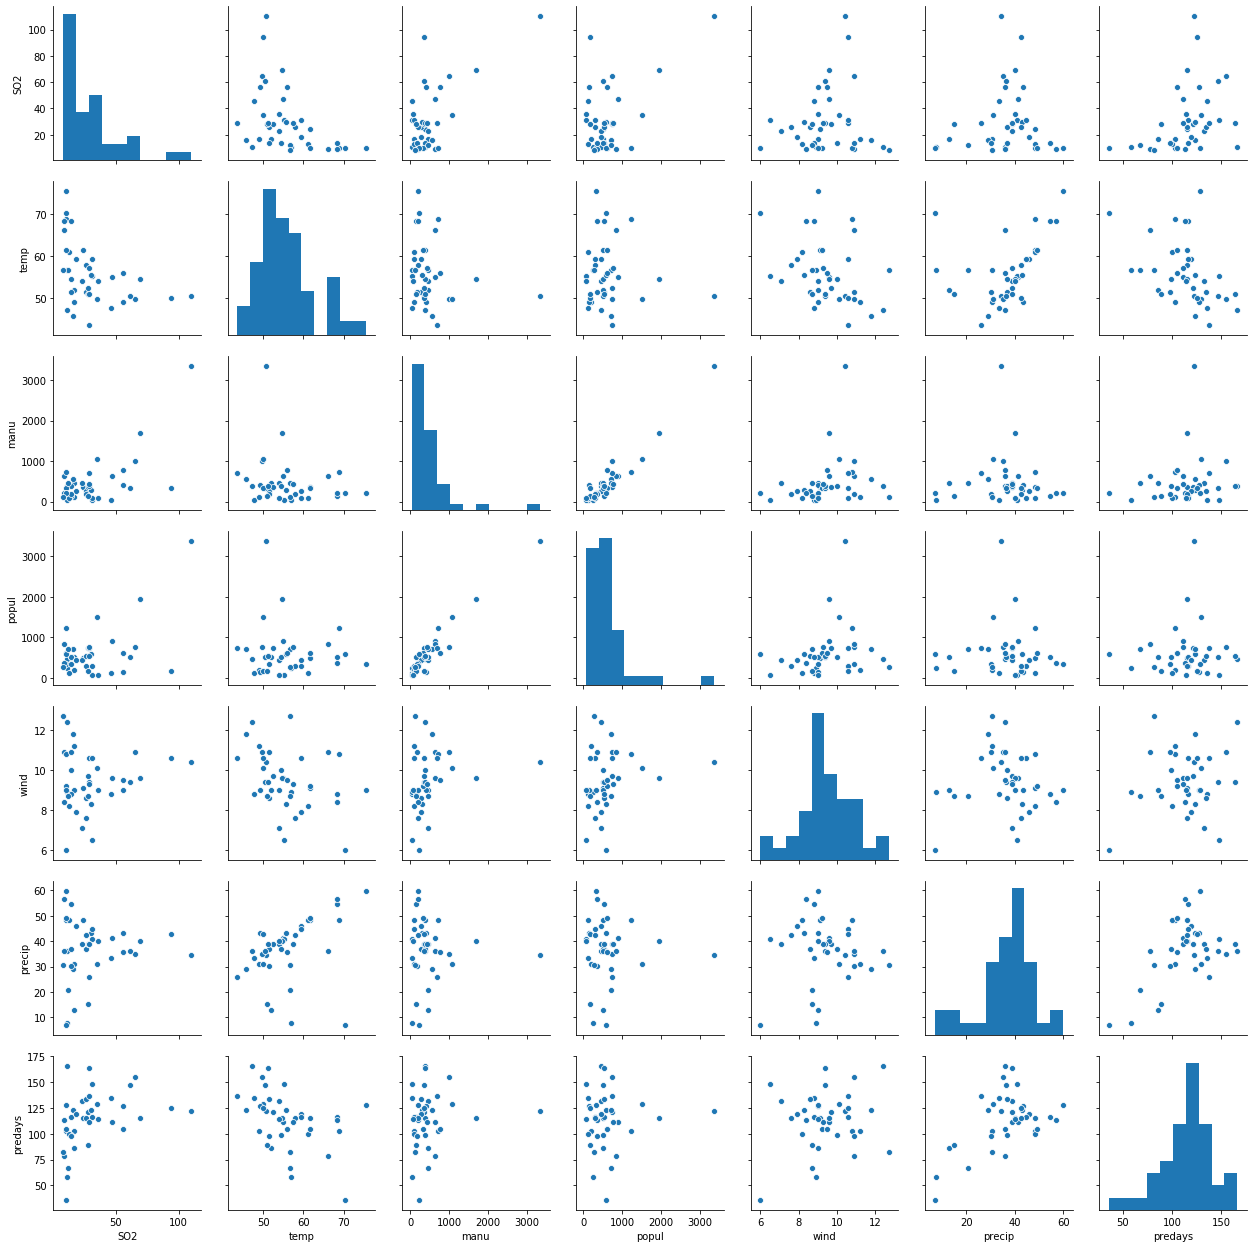

In [7]:
sns.pairplot(pollution)

In [9]:
pollution.corr()

,SO2,temp,manu,popul,wind,precip,predays
SO2,1.000000,-0.433600,0.644769,0.493780,0.094690,0.054294,0.369564
temp,-0.433600,1.000000,-0.190042,-0.062678,-0.349740,0.386253,-0.430242
manu,0.644769,-0.190042,1.000000,0.955269,0.237947,-0.032417,0.131829
popul,0.493780,-0.062678,0.955269,1.000000,0.212644,-0.026119,0.042083
wind,0.094690,-0.349740,0.237947,0.212644,1.000000,-0.012994,0.164106
precip,0.054294,0.386253,-0.032417,-0.026119,-0.012994,1.000000,0.496097
predays,0.369564,-0.430242,0.131829,0.042083,0.164106,0.496097,1.000000


In [10]:
pollution.corr(method='kendall')

,SO2,temp,manu,popul,wind,precip,predays
SO2,1.000000,-0.379267,0.181382,0.080203,0.046106,0.008637,0.363307
temp,-0.379267,1.000000,-0.141636,0.034188,-0.291010,0.402931,-0.353377
manu,0.181382,-0.141636,1.000000,0.658537,0.280802,-0.126829,0.105393
popul,0.080203,0.034188,0.658537,1.000000,0.234002,-0.082927,0.009804
wind,0.046106,-0.291010,0.280802,0.234002,1.000000,-0.194591,0.019802
precip,0.008637,0.402931,-0.126829,-0.082927,-0.194591,1.000000,0.154414
predays,0.363307,-0.353377,0.105393,0.009804,0.019802,0.154414,1.000000


In [11]:
pollution.corr(method='spearman')

,SO2,temp,manu,popul,wind,precip,predays
SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
temp,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
manu,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
popul,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
wind,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
precip,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
predays,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


#### Outlier treatment with zscore and IQR
>https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

- The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.


In [15]:
z = np.abs(stats.zscore(pollution))

(array([6, 6, 6], dtype=int64), array([0, 2, 3], dtype=int64))


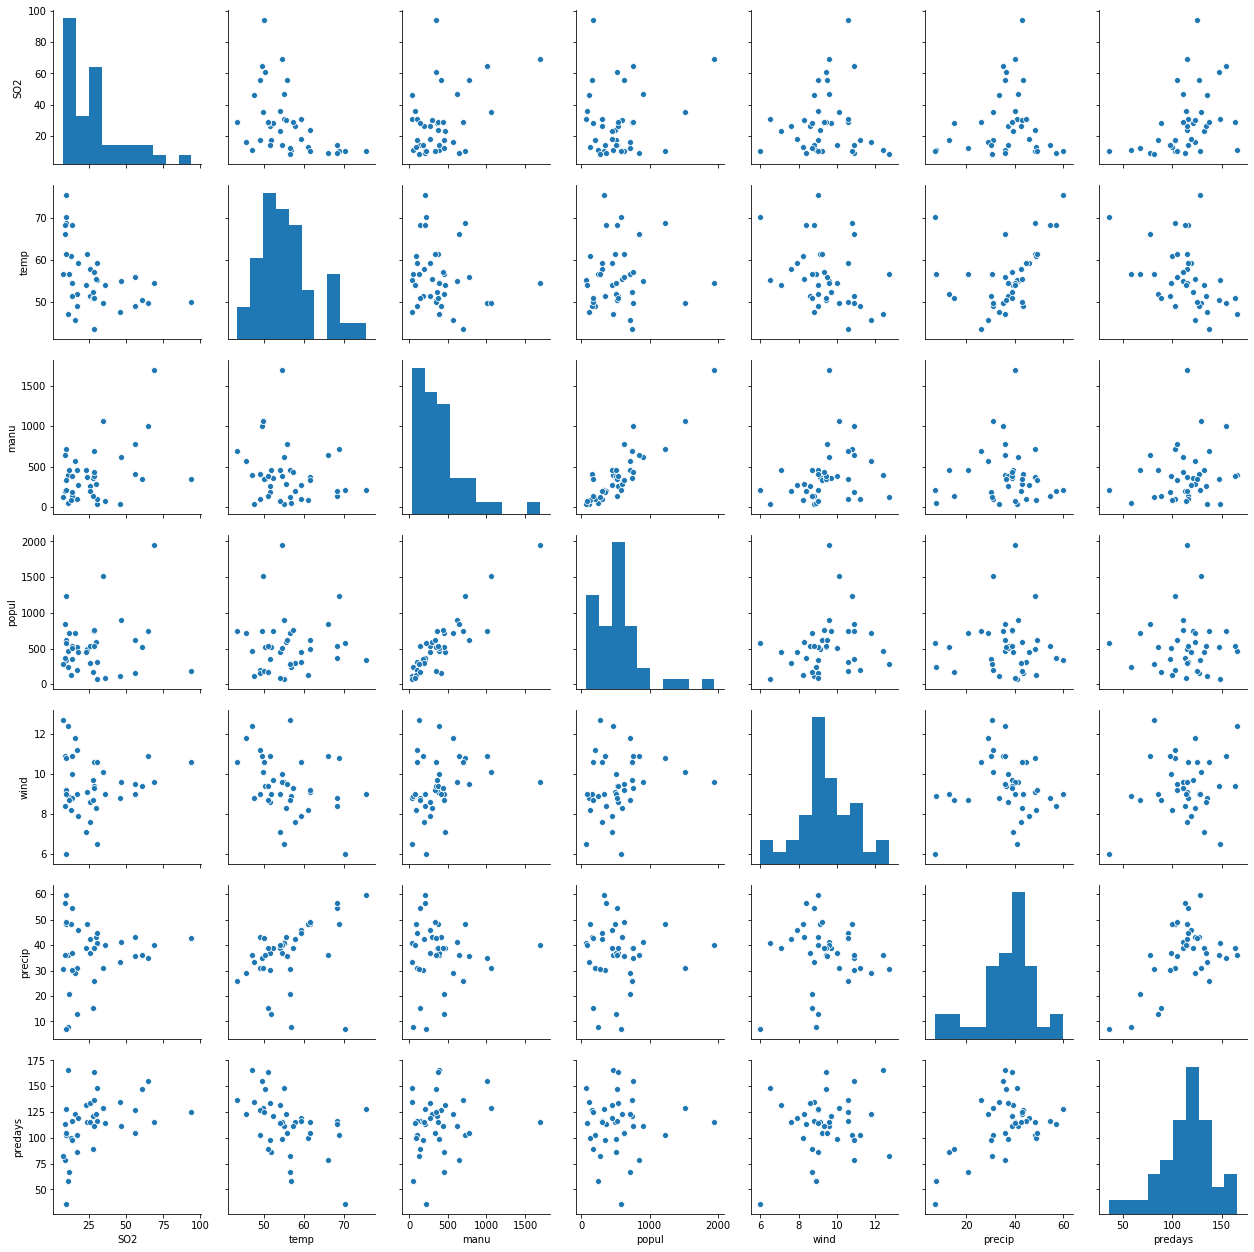

In [29]:
threshold = 3
print(np.where(z > threshold))
pollution_o = pollution[(z < threshold).all(axis=1)]
pollution_o.shape
sns.pairplot(pollution_o)

In [35]:
pollution.iloc[np.where(z > threshold)]

,SO2,manu,popul
Chicago,110,3344,3369
Chicago,110,3344,3369
Chicago,110,3344,3369


In [49]:
pollution_IQR.corr(method='spearman')

,SO2,temp,manu,popul,wind,precip,predays
SO2,1.000000,-0.491143,-0.032302,-0.147380,-0.158248,-0.055245,0.606189
temp,-0.491143,1.000000,-0.009166,0.178552,-0.190900,0.673694,-0.384263
manu,-0.032302,-0.009166,1.000000,0.794721,0.314042,-0.203079,-0.097378
popul,-0.147380,0.178552,0.794721,1.000000,0.379896,-0.068915,-0.082707
wind,-0.158248,-0.190900,0.314042,0.379896,1.000000,-0.378795,-0.288703
precip,-0.055245,0.673694,-0.203079,-0.068915,-0.378795,1.000000,0.221346
predays,0.606189,-0.384263,-0.097378,-0.082707,-0.288703,0.221346,1.000000


,SO2,temp,manu,popul,wind,precip,predays
SO2,False,False,True,True,False,True,False
temp,False,False,True,False,True,False,True
manu,True,True,False,True,False,False,True
popul,True,False,True,False,False,False,False
wind,False,True,False,False,False,False,False
precip,True,False,False,False,False,False,True
predays,False,True,True,False,False,True,False


SO2         22.00
temp         8.70
manu       281.00
popul      418.00
wind         1.90
precip      12.15
predays     25.00
dtype: float64


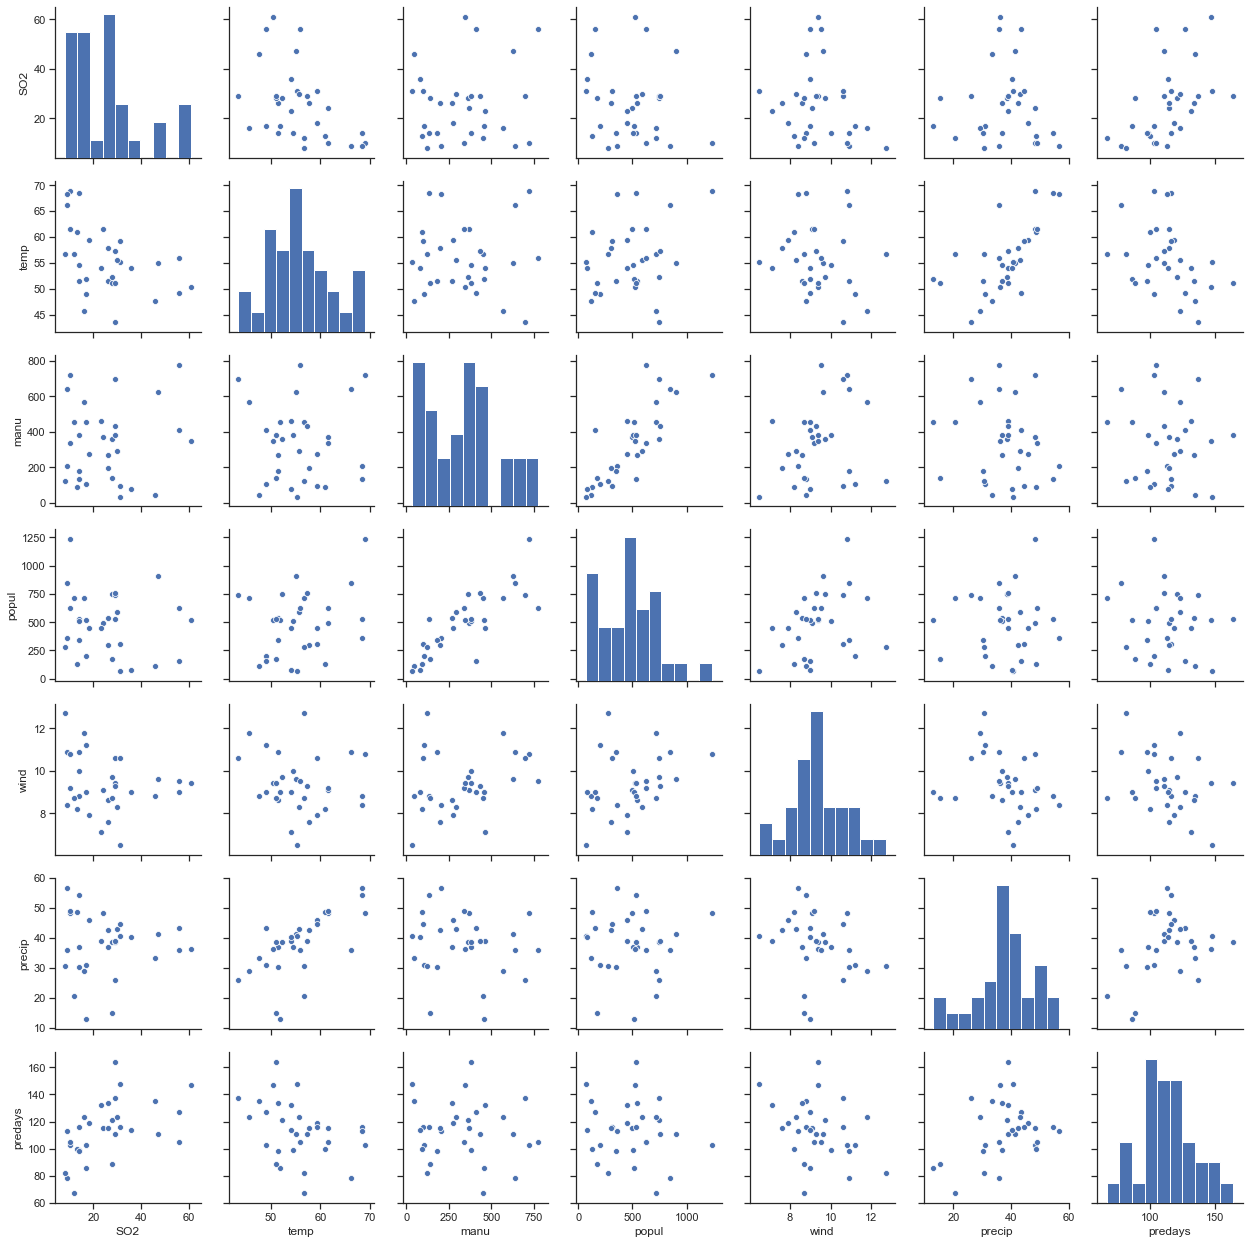

In [37]:
Q1 = pollution.quantile(0.25)
Q3 = pollution.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
pollution_IQR = pollution[~((pollution < (Q1 - 1.5 * IQR)) |(pollution > (Q3 + 1.5 * IQR))).any(axis=1)]
pollution_IQR.shape
sns.pairplot(pollution_IQR)

In [41]:
pollution.index[~pollution.index.isin(pollution_IQR.index)]

Index(['Albuquerque', 'Buffalo', 'Chicago', 'Cleveland', 'Detroit', 'Miami',
       'Philadelphia', 'Phoenix', 'Providence'],
      dtype='object')

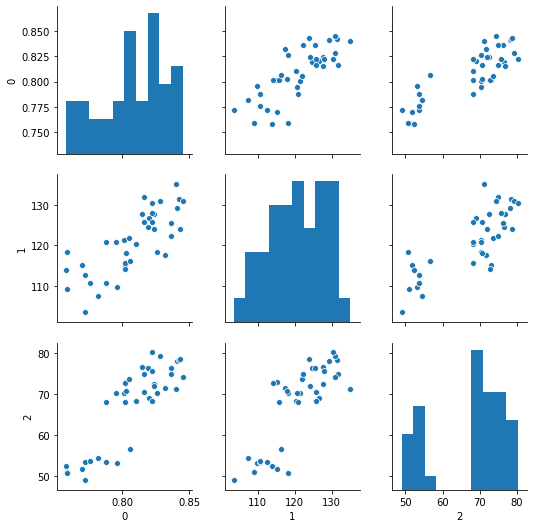

In [25]:
cleaned_pollution.corr()

,0,1,2
0,1.000000,0.776119,0.856002
1,0.776119,1.000000,0.807876
2,0.856002,0.807876,1.000000


In [28]:
cleaned_pollution.corr(method='kendall')

,0,1,2
0,1.000000,0.569223,0.615006
1,0.569223,1.000000,0.572529
2,0.615006,0.572529,1.000000


In [29]:
cleaned_pollution.corr(method='spearman')

,0,1,2
0,1.000000,0.773047,0.795363
1,0.773047,1.000000,0.765738
2,0.795363,0.765738,1.000000


((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([0.758, 0.759, 0.759, 0.77 , 0.772, 0.772, 0.776, 0.782, 0.788,
         0.788, 0.795, 0.796, 0.801, 0.802, 0.802, 0.802, 0.803, 0.805,
         0.806, 0.81 , 0.815, 0.816, 0.816, 0.819, 0.82 , 0.822, 0.822,
         0.822, 0.824, 0.824, 0.826, 0.828, 0.832, 0.836, 0.836, 0.84 ,
         0.841, 0.842, 0.843, 0.845, 0.971])),
 (0.032818267460069335, 0.8118536585365852, 0.895

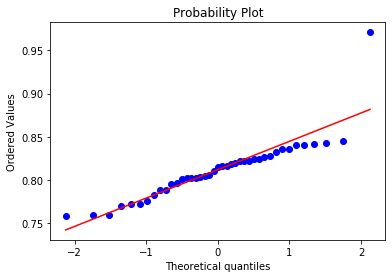

In [54]:
# make qqplot
scipy.stats.probplot(pollution[0], dist="norm", plot=plt)

#### Test for multivariate normality

In [31]:
import pingouin as pg
normal, p = pg.multivariate_normality(pollution, alpha=.05)

In [50]:
print(normal, p)

False 2.819996122097376e-10
